<a href="https://colab.research.google.com/github/Praneethamurala1214/AICTE/blob/main/Project_2_Proposal_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os, re, glob, math
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import display

In [5]:
from google.colab import files
uploaded = files.upload()

Saving ifood_df.csv to ifood_df (1).csv


In [6]:
import pandas as pd
file_path = "ifood_df.csv"
df = pd.read_csv(file_path)
print("----- First 5 Rows of Dataset -----")
print(df.head())
print("\n----- Dataset Information -----")
print(df.info())
print("\n----- Missing Values in Each Column -----")
print(df.isnull().sum())
print("\n----- Summary Statistics -----")
print(df.describe().T)
df.to_csv("ifood_df_raw_backup.csv", index=False)
print("\n Data Collection complete: Dataset loaded and initial inspection done.")


----- First 5 Rows of Dataset -----
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  ed

----- Dataset Shape -----
Rows: 2205, Columns: 39

----- Column Names -----
['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']

----- Data Types -----
Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts     

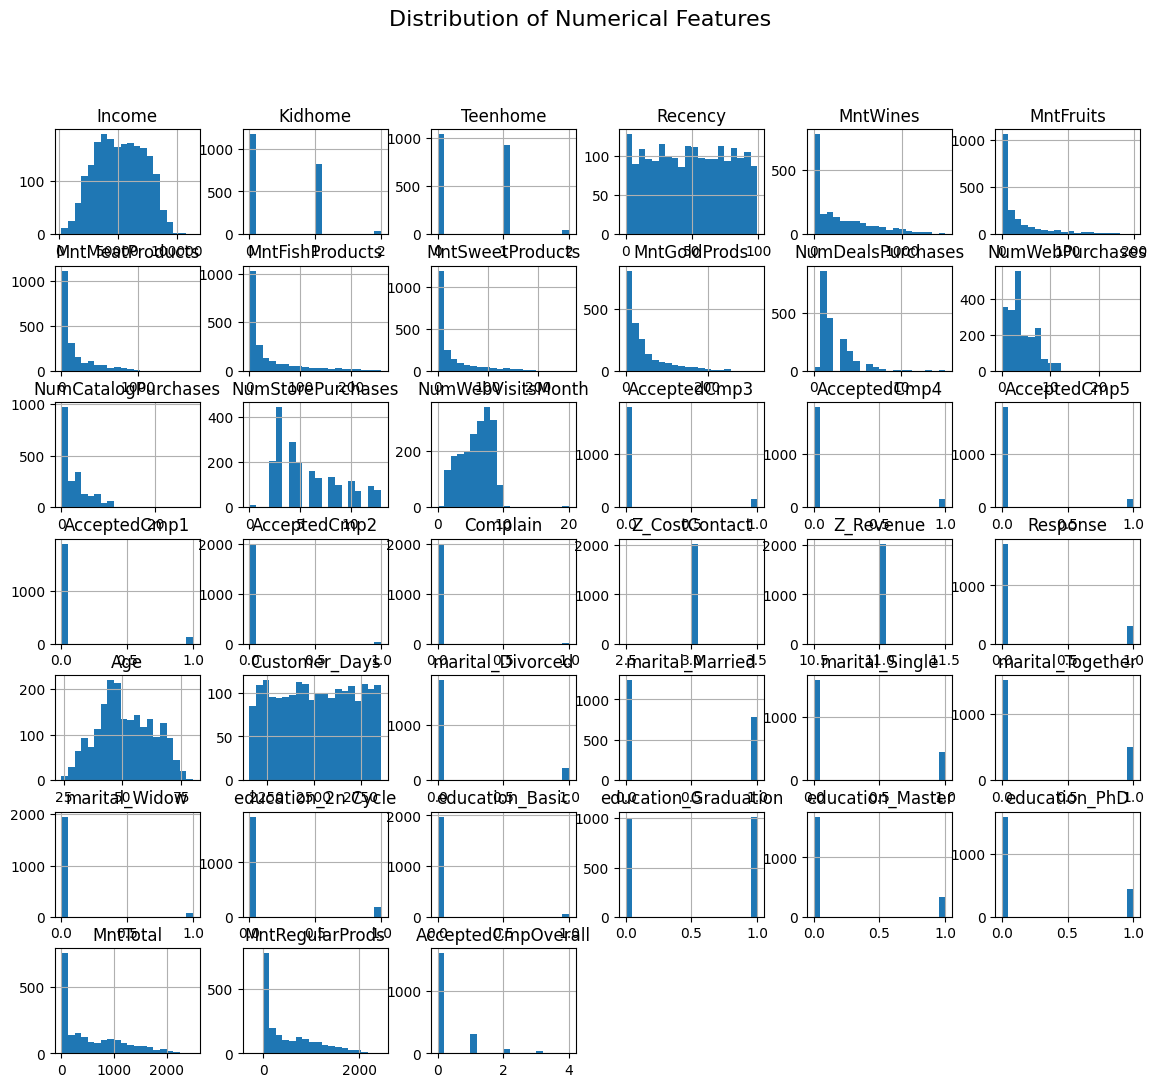


 Data Exploration & Cleaning complete: Cleaned dataset saved as 'ifood_df_cleaned.csv'


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "ifood_df.csv"
df = pd.read_csv(file_path)
print("----- Dataset Shape -----")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n----- Column Names -----")
print(df.columns.tolist())

print("\n----- Data Types -----")
print(df.dtypes)
print("\n----- Missing Values Count -----")
print(df.isnull().sum())
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
print("\n----- Summary Statistics -----")
print(df.describe().T)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(14, 12), bins=20)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.show()
if "Income" in df.columns and df["Income"].isnull().sum() > 0:
    median_income = df["Income"].median()
    df["Income"].fillna(median_income, inplace=True)
    print(f" Missing 'Income' values filled with median ({median_income}).")
df.to_csv("ifood_df_cleaned.csv", index=False)
print("\n Data Exploration & Cleaning complete: Cleaned dataset saved as 'ifood_df_cleaned.csv'")


In [8]:
import pandas as pd
file_path = "ifood_df_cleaned.csv"
df = pd.read_csv(file_path)
spend_columns = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]
df["TotalSpend"] = df[spend_columns].sum(axis=1)
purchase_columns = [
    "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"
]
df["TotalPurchases"] = df[purchase_columns].sum(axis=1)
df["AvgPurchaseValue"] = df["TotalSpend"] / df["TotalPurchases"]
df.rename(columns={"Recency": "DaysSinceLastPurchase"}, inplace=True)
metrics_summary = df[["TotalSpend", "TotalPurchases", "AvgPurchaseValue", "DaysSinceLastPurchase"]].describe()
print("----- Key Metrics Summary -----")
print(metrics_summary)
df.to_csv("ifood_df_with_metrics.csv", index=False)
print("\n Descriptive Statistics calculated and saved as 'ifood_df_with_metrics.csv'")


----- Key Metrics Summary -----
        TotalSpend  TotalPurchases  AvgPurchaseValue  DaysSinceLastPurchase
count  2021.000000     2021.000000       2021.000000            2021.000000
mean    607.711034       12.567541               inf              48.880752
std     602.396167        7.162472               NaN              28.950917
min       5.000000        0.000000          2.666667               0.000000
25%      69.000000        6.000000         13.000000              24.000000
50%     397.000000       12.000000         30.000000              49.000000
75%    1048.000000       18.000000         50.555556              74.000000
max    2525.000000       32.000000               inf              99.000000

✅ Descriptive Statistics calculated and saved as 'ifood_df_with_metrics.csv'


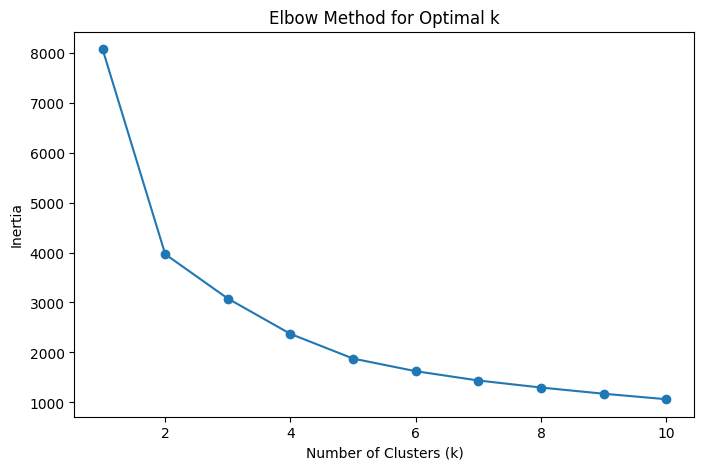


----- Cluster Summary -----
          TotalSpend  TotalPurchases  AvgPurchaseValue  DaysSinceLastPurchase
Cluster                                                                      
0         135.553875        6.835539         16.092405              22.848771
1        1490.354348       18.056522         84.766770              50.119565
2         136.619485        6.871324         16.362598              74.001838
3         819.347107       20.121901         40.261037              47.973140


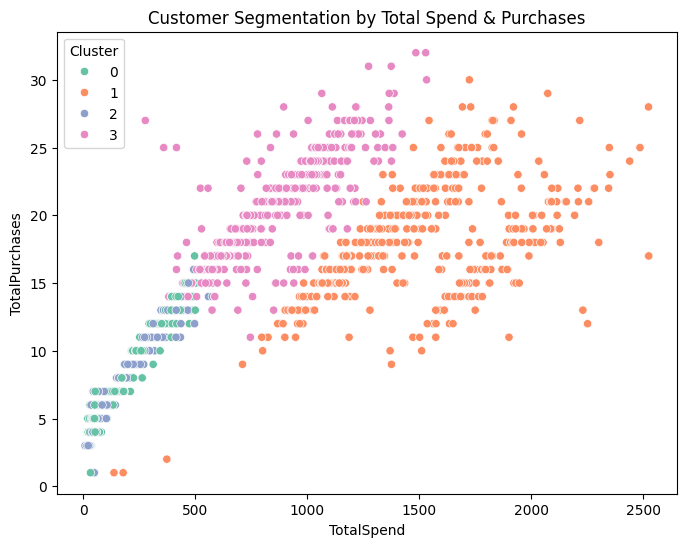


 Customer Segmentation complete. Results saved as 'ifood_df_segmented.csv'


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
file_path = "ifood_df_with_metrics.csv"
df = pd.read_csv(file_path)
features = ["TotalSpend", "TotalPurchases", "AvgPurchaseValue", "DaysSinceLastPurchase"]
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=features, inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)
print("\n----- Cluster Summary -----")
cluster_summary = df.groupby("Cluster")[features].mean()
print(cluster_summary)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="TotalSpend",
    y="TotalPurchases",
    hue="Cluster",
    palette="Set2"
)
plt.title("Customer Segmentation by Total Spend & Purchases")
plt.show()
df.to_csv("ifood_df_segmented.csv", index=False)
print("\n Customer Segmentation complete. Results saved as 'ifood_df_segmented.csv'")


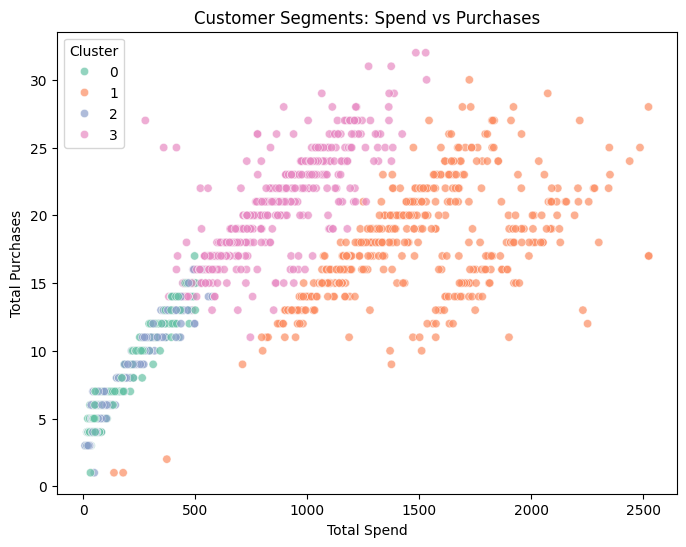

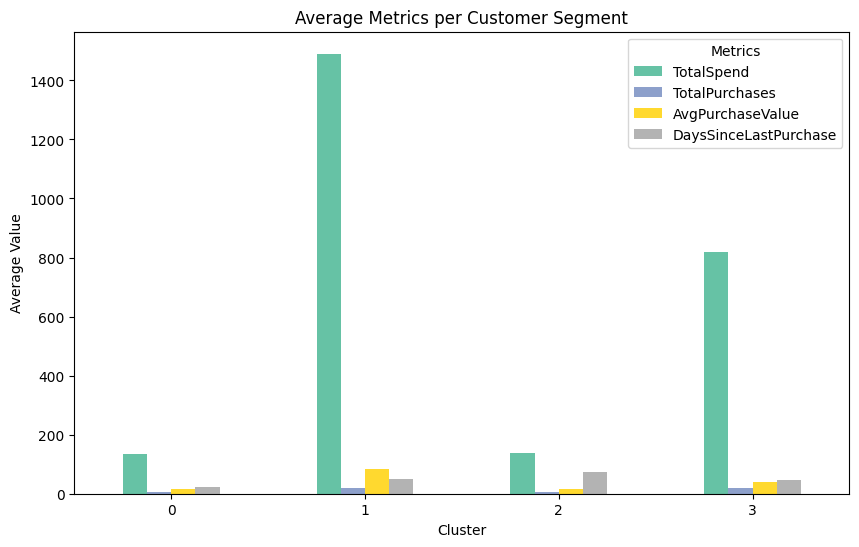

/tmp/ipython-input-3132819154.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


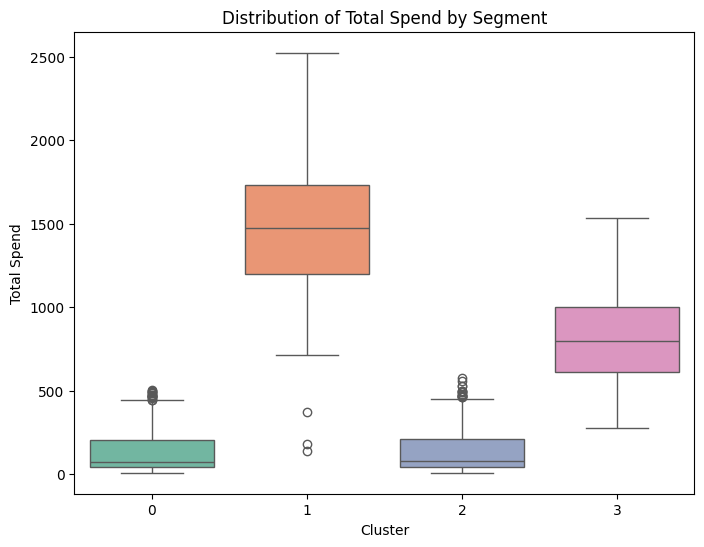

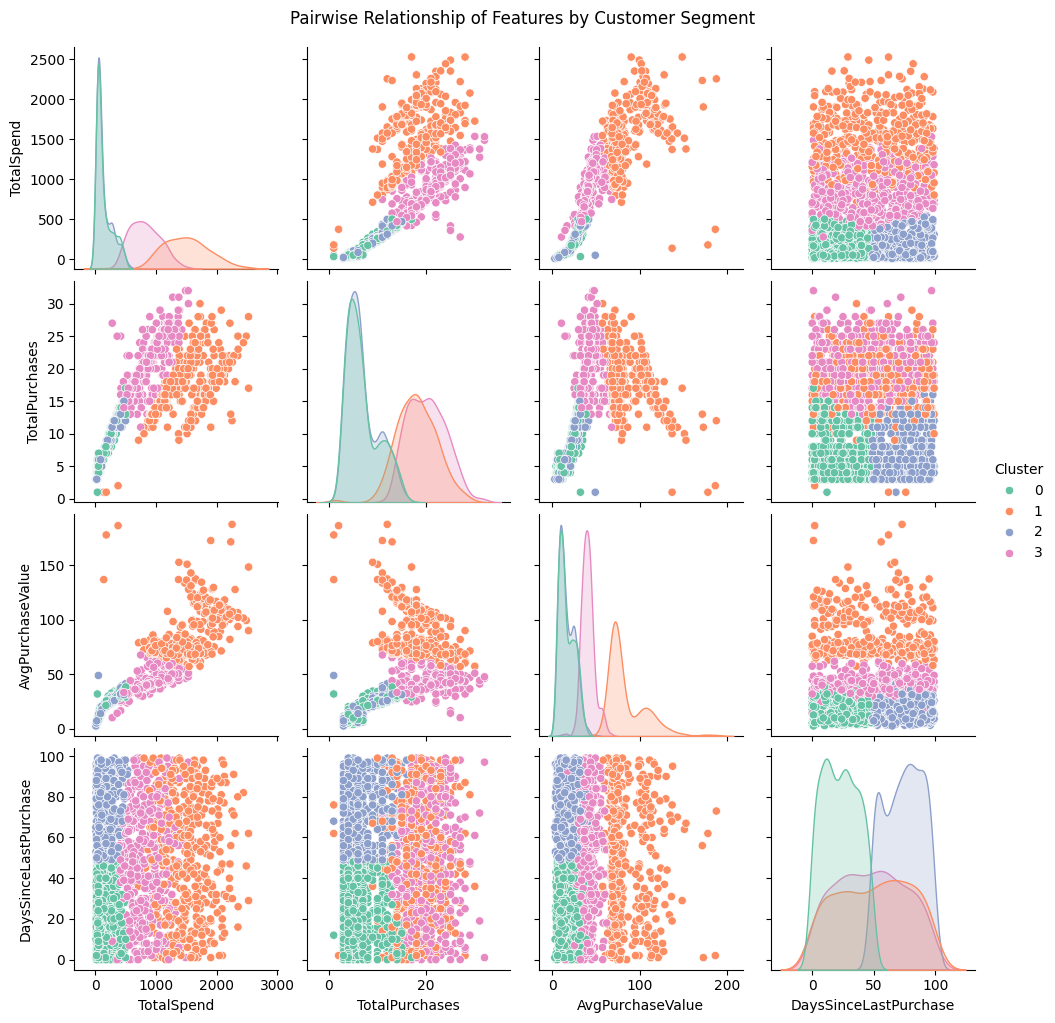

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ifood_df_segmented.csv")
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="TotalSpend",
    y="TotalPurchases",
    hue="Cluster",
    palette="Set2",
    alpha=0.7
)
plt.title("Customer Segments: Spend vs Purchases")
plt.xlabel("Total Spend")
plt.ylabel("Total Purchases")
plt.legend(title="Cluster")
plt.show()
cluster_means = df.groupby("Cluster")[["TotalSpend", "TotalPurchases", "AvgPurchaseValue", "DaysSinceLastPurchase"]].mean()

cluster_means.plot(kind="bar", figsize=(10, 6), colormap="Set2")
plt.title("Average Metrics per Customer Segment")
plt.ylabel("Average Value")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="Cluster",
    y="TotalSpend",
    palette="Set2"
)
plt.title("Distribution of Total Spend by Segment")
plt.xlabel("Cluster")
plt.ylabel("Total Spend")
plt.show()
sns.pairplot(
    df[["TotalSpend", "TotalPurchases", "AvgPurchaseValue", "DaysSinceLastPurchase", "Cluster"]],
    hue="Cluster",
    palette="Set2",
    diag_kind="kde"
)
plt.suptitle("Pairwise Relationship of Features by Customer Segment", y=1.02)
plt.show()
